<a href="https://colab.research.google.com/github/SP-TechForest/Python-creations/blob/main/Data_Cleaning_Housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import matplotlib.pyplot as plt 
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import skew

from collections import OrderedDict

In [54]:
hs_train = pd.read_csv("HS_TRAIN.csv",index_col="Id")
hs_test = pd.read_csv("HS_TEST.csv",index_col="Id")

In [55]:
hs_train.shape, hs_test.shape

((1460, 80), (1459, 79))

In [56]:
hs_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#<u>Checking The Null Values</u> 

In [57]:
hs_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [58]:
hs_train.columns[hs_train.isna().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [59]:
def Find_missing_values (data):
  missing_columns = data.columns[data.isna().any()]
  missing_data = data[missing_columns].isna().mean().sort_values(ascending = False)*100
  return missing_data

In [60]:
hs_train_md = Find_missing_values(hs_train)
hs_test_md = Find_missing_values(hs_test)

In [61]:
px.bar(x = hs_test_md.axes[0],y = hs_test_md.values)

In [62]:
px.bar(x = hs_train_md.axes[0], y = hs_train_md.values)

In [63]:
pd.DataFrame(data={"HS_train Null Average value": hs_train.isna().mean()[hs_train.isna().mean()>0]*100,
                   "HS_test Null Average value": hs_test.isna().mean()[hs_test.isna().mean()>0]*100})

,HS_train Null Average value,HS_test Null Average value
Alley,93.767123,92.666210
BsmtCond,2.534247,3.084304
BsmtExposure,2.602740,3.015764
BsmtFinSF1,NaN,0.068540
BsmtFinSF2,NaN,0.068540
BsmtFinType1,2.534247,2.878684
BsmtFinType2,2.602740,2.878684
BsmtFullBath,NaN,0.137080
BsmtHalfBath,NaN,0.137080
BsmtQual,2.534247,3.015764


#<u>Finding Outliers  

In [64]:
numeric_data = hs_train.select_dtypes(exclude=["object"]).drop(["SalePrice"],axis = 1).copy()

In [65]:
numeric_data.columns, len(numeric_data.columns)

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold'],
       dtype='object'), 36)

In [66]:
categorical_data = hs_train.select_dtypes(include = ['object']).copy()

In [67]:
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [68]:
#Total number of columns
hs_train.shape[1]

80

In [69]:
# Numerical Data doesn't include SalePrice column 
f"numeric columns: {len(numeric_data.columns)}", f"categorical columns: {len(categorical_data.columns)}"

('numeric columns: 36', 'categorical columns: 43')

In [70]:
px.histogram(x = numeric_data.iloc[:,1],labels={"x":numeric_data.columns[1]})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

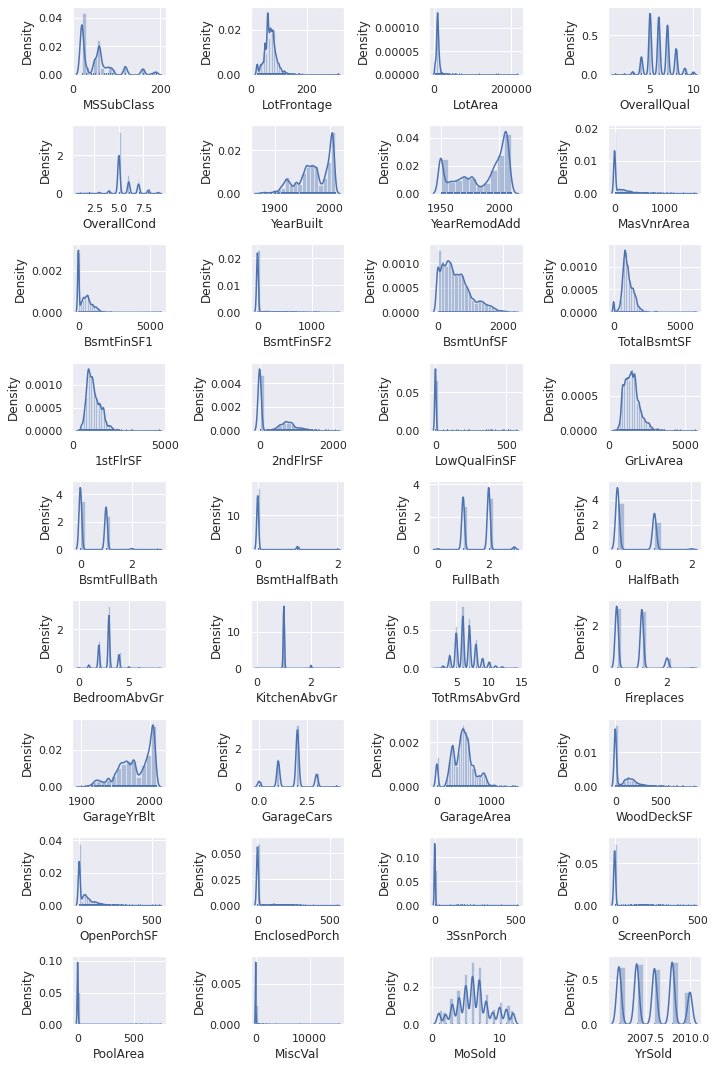

In [71]:
fig = plt.figure(figsize=(10,15))
for i in range(len(numeric_data.columns)):
  fig.add_subplot(9,4,i+1)
  sns.distplot(numeric_data.iloc[:,i].dropna(),
               rug=True, hist=True, kde_kws={'bw':0.1})
  plt.xlabel(numeric_data.columns[i])
plt.tight_layout()
plt.show()


In [72]:

def finding_outliers(data):
  outliers = []
  Outlier_columnss = []
  data = data.dropna()
  for i in range(len(data.columns)):
    unique = data.iloc[:,i].nunique()
    q1,q3 = np.percentile(data.iloc[:,i], [25,75])
    iqr = q3-q1
    lf = q1 - (1.5*iqr)
    hf = q3 + (1.5*iqr)
    for j in data.iloc[:,i]:
      if j<lf or j>hf:
        outliers.append(j)
    n_outliers = len(list(OrderedDict.fromkeys(outliers)))
    if n_outliers > 0 and unique>5:
      Outlier_columnss.append(data.columns[i])
    outlier = []
  return Outlier_columnss

In [73]:
Outliers_columns = finding_outliers(numeric_data)

In [74]:
Outliers_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

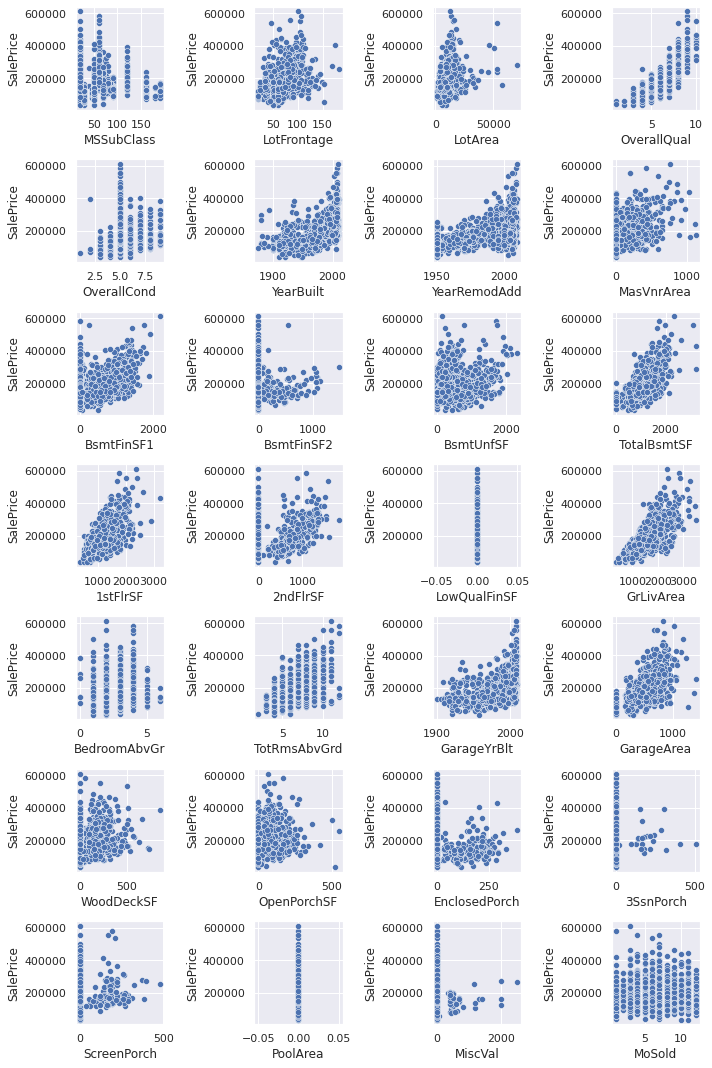

In [94]:
fig2 = plt.figure(figsize=(10,15))
for i in range(len(Outliers_columns)):
  fig2.add_subplot(7,4,i+1)
  sns.scatterplot(numeric_data[Outliers_columns[i]], hs_train.SalePrice)
plt.tight_layout()
plt.show()

#Outliers based on scatter plot<br>
#####LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea, LowQualFinSF, PoolArea, MiscVal

In [76]:
len(Outliers_columns)

28

(array([ 605.,  765., 1124., 1218., 1270., 1357., 1357., 1357., 1420.,
        1460.]),
 array([ 20.,  37.,  54.,  71.,  88., 105., 122., 139., 156., 173., 190.]),
 <a list of 1 Patch objects>)

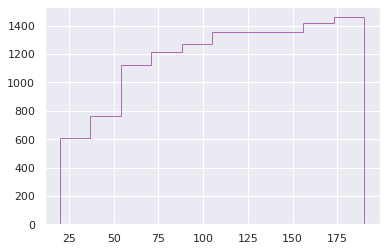

In [77]:
plt.hist(numeric_data.MSSubClass, cumulative=True, label='CDF DATA', 
         histtype='step', alpha=0.55, color='purple')

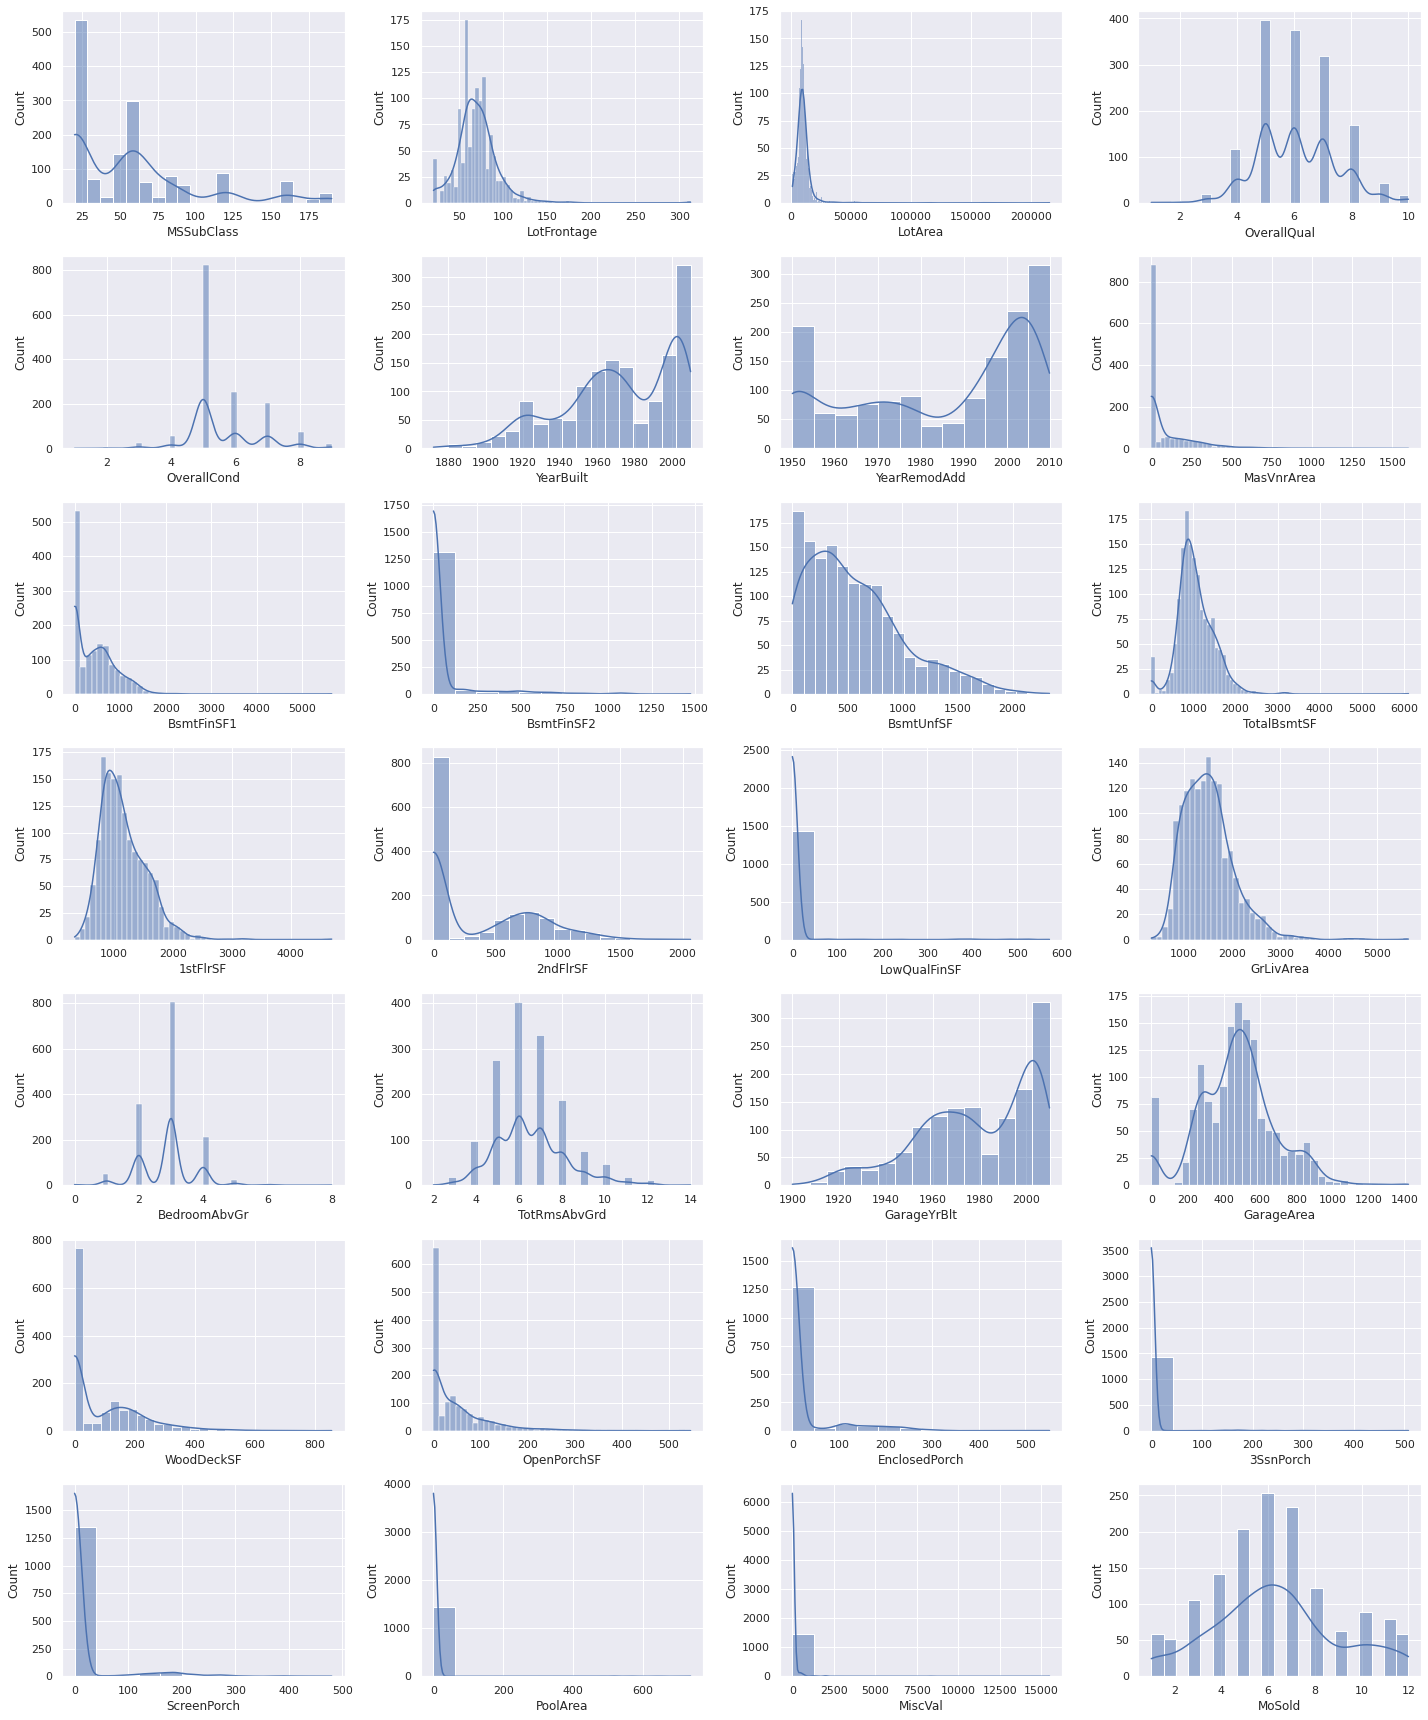

In [78]:
fig3 = plt.figure(figsize=(20,24))
for i in range(len(Outliers_columns)):
  fig3.add_subplot(7,4, i+1)
  sns.histplot(numeric_data[Outliers_columns[i]], kde=True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

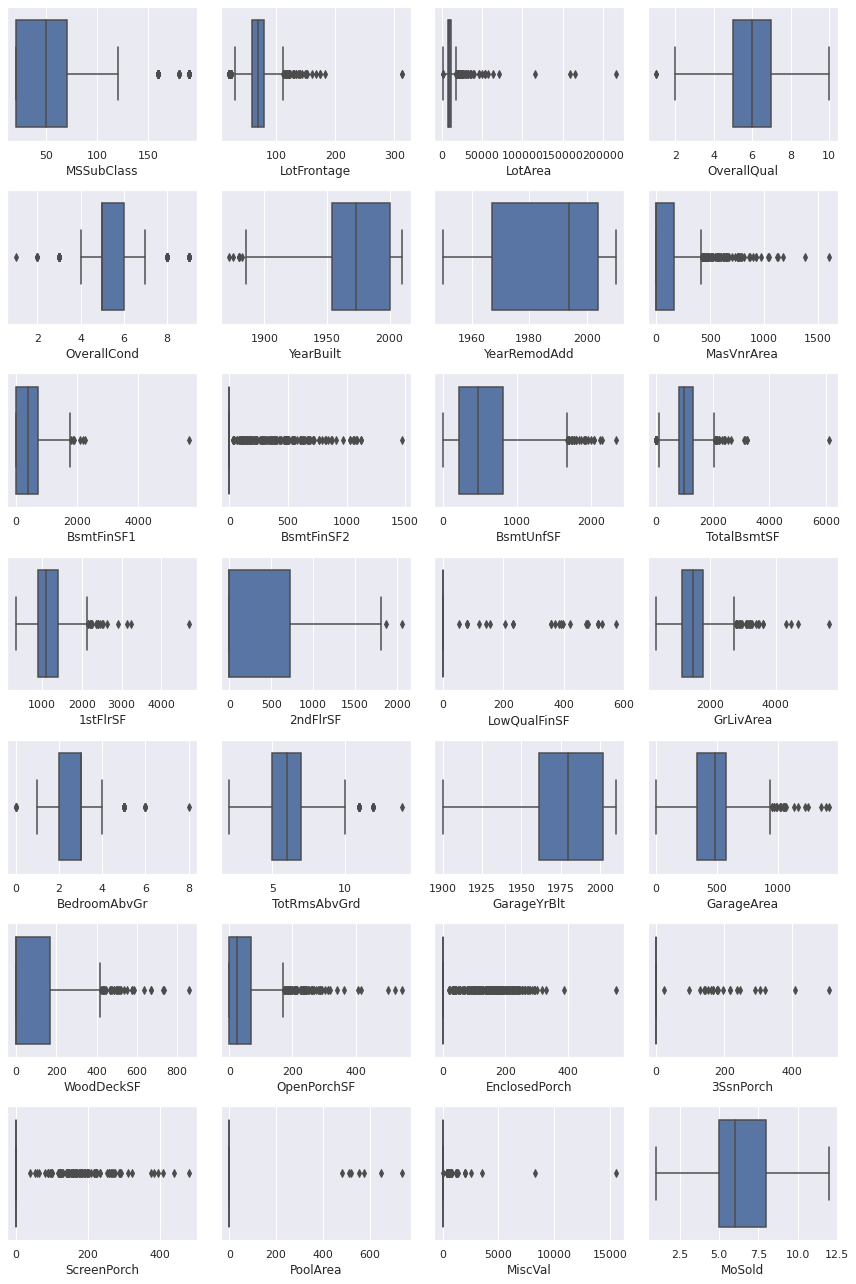

In [79]:
fig3 = plt.figure(figsize=(12,18))
for i in range(len(Outliers_columns)):
  fig3.add_subplot(7,4, i+1)
  sns.boxplot(numeric_data[Outliers_columns[i]])
plt.tight_layout()
plt.show()

In [80]:
Main_Outlier = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1"
, "TotalBsmtSF", "1stFlrSF", "GrLivArea", "LowQualFinSF", "PoolArea", "MiscVal"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



ValueError: ignored

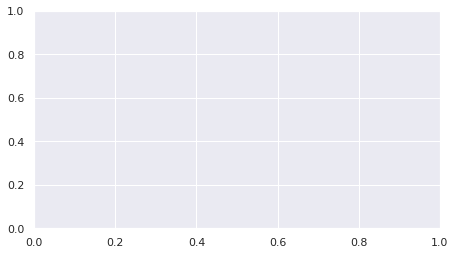

In [92]:
fig4 = plt.figure(figsize = (16,28))
for i in range(len(Main_Outlier)):
  fig4.add_subplot(6,2, i+1)
  sns.regplot(numeric_data[Main_Outlier[i]], hs_train.SalePrice)
plt.tight_layout()
plt.plot()

In [85]:
hs_train = hs_train.drop(hs_train[hs_train['LotFrontage']>200].index)
hs_train = hs_train.drop(hs_train[hs_train['LotArea']>100000].index)
hs_train = hs_train.drop(hs_train[hs_train['MasVnrArea']>1200].index)
hs_train = hs_train.drop(hs_train[hs_train['BsmtFinSF1']>3000].index)
hs_train = hs_train.drop(hs_train[hs_train['TotalBsmtSF']>4000].index)
hs_train = hs_train.drop(hs_train[hs_train['1stFlrSF']>3500].index)
hs_train = hs_train.drop(hs_train[hs_train['GrLivArea']>4000].index)
hs_train = hs_train.drop(hs_train[hs_train['LowQualFinSF']>20].index)
hs_train = hs_train.drop(hs_train[hs_train['PoolArea']>200].index)
hs_train = hs_train.drop(hs_train[hs_train['MiscVal']>2500].index)

In [96]:
px.imshow(hs_train.corr())

In [99]:
px.bar(hs_train.corr()["SalePrice"])

In [102]:
hs_train.corr()["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.805563
GrLivArea        0.730794
GarageCars       0.655170
TotalBsmtSF      0.649862
GarageArea       0.642666
1stFlrSF         0.622774
FullBath         0.558632
YearBuilt        0.555705
TotRmsAbvGrd     0.547920
YearRemodAdd     0.531298
GarageYrBlt      0.515919
MasVnrArea       0.475839
Fireplaces       0.458510
BsmtFinSF1       0.391338
LotFrontage      0.360730
LotArea          0.349741
OpenPorchSF      0.332716
WoodDeckSF       0.321955
2ndFlrSF         0.287869
HalfBath         0.284612
BsmtFullBath     0.230364
BsmtUnfSF        0.229009
BedroomAbvGr     0.154087
ScreenPorch      0.099801
MoSold           0.058804
3SsnPorch        0.051498
YrSold          -0.011877
BsmtFinSF2      -0.019396
MiscVal         -0.029778
BsmtHalfBath    -0.043509
MSSubClass      -0.086471
OverallCond     -0.091009
EnclosedPorch   -0.134527
KitchenAbvGr    -0.141031
LowQualFinSF          NaN
PoolArea              NaN
Name: SalePrice, dtype: float64

In [105]:
hs_train.LotShape.mode()[0]

'Reg'

In [112]:
hs_train['LotShape'].value_counts().axes[0][0]

'Reg'

In [113]:
hs_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.430861,-0.289253,0.034151,-0.065556,0.034948,0.043023,0.033165,-0.071549,-0.062778,...,-0.018394,-0.019755,-0.010620,-0.043139,-0.027218,NaN,-0.050627,-0.013829,-0.013071,-0.086471
LotFrontage,-0.430861,1.000000,0.466337,0.233231,-0.062687,0.145314,0.078799,0.181017,0.123754,0.038898,...,0.085675,0.144314,-0.019223,0.086437,0.050155,NaN,0.009265,0.017112,0.008524,0.360730
LotArea,-0.289253,0.466337,1.000000,0.140263,-0.023053,0.035316,0.023373,0.105232,0.189923,0.080583,...,0.214781,0.131908,-0.016310,0.050618,0.095126,NaN,0.010905,0.005478,-0.020161,0.349741
OverallQual,0.034151,0.233231,0.140263,1.000000,-0.097361,0.587922,0.554370,0.404317,0.209067,-0.059689,...,0.241330,0.296030,-0.117528,0.034810,0.050510,NaN,-0.044499,0.076418,-0.013591,0.805563
OverallCond,-0.065556,-0.062687,-0.023053,-0.097361,1.000000,-0.384648,0.072681,-0.131061,-0.039496,0.042565,...,-0.009237,-0.036028,0.093274,0.022583,0.047782,NaN,0.100320,-0.002121,0.050364,-0.091009
YearBuilt,0.034948,0.145314,0.035316,0.587922,-0.384648,1.000000,0.601503,0.315186,0.247411,-0.050230,...,0.226822,0.192602,-0.393243,0.036193,-0.049405,NaN,-0.070418,0.018603,-0.009397,0.555705
YearRemodAdd,0.043023,0.078799,0.023373,0.554370,0.072681,0.601503,1.000000,0.173078,0.116657,-0.071327,...,0.213185,0.229862,-0.203327,0.045433,-0.044370,NaN,-0.027957,0.022793,0.040452,0.531298
MasVnrArea,0.033165,0.181017,0.105232,0.404317,-0.131061,0.315186,0.173078,1.000000,0.228395,-0.071029,...,0.153628,0.115208,-0.109790,0.023508,0.049534,NaN,-0.031664,0.004680,0.005099,0.475839
BsmtFinSF1,-0.071549,0.123754,0.189923,0.209067,-0.039496,0.247411,0.116657,0.228395,1.000000,-0.060540,...,0.197366,0.084460,-0.118762,0.033478,0.072550,NaN,0.006923,-0.002146,0.017959,0.391338
BsmtFinSF2,-0.062778,0.038898,0.080583,-0.059689,0.042565,-0.050230,-0.071327,-0.071029,-0.060540,1.000000,...,0.074014,0.012868,0.035962,-0.029244,0.083650,NaN,-0.020308,-0.007881,0.029743,-0.019396
